In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data into a dataframe 
df = pd.read_csv('breastCancer.csv')

In [3]:
#examine the first 5 rows of all features of the data
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
#Details of dataset- all features have 699 objects. There are 11 columns - 9 features, ID and target output(class)
# One feature, 'bare_nucleoli' is an object, whereas the rest are int64. hmmmm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                   699 non-null int64
clump_thickness      699 non-null int64
size_uniformity      699 non-null int64
shape_uniformity     699 non-null int64
marginal_adhesion    699 non-null int64
epithelial_size      699 non-null int64
bare_nucleoli        699 non-null object
bland_chromatin      699 non-null int64
normal_nucleoli      699 non-null int64
mitoses              699 non-null int64
class                699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
df.describe() # statistical look at each feature - each feature is on a 1-10 scale

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
#Looking at the values in 'bare_nucleoli', we can see that there are 16 values of '?'
#From the documentation included with the dataset, it was noted that the '?' are 'unavailable attribute values'

df['bare_nucleoli'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [7]:
#Rather than estimate a value replacement for '?' I chose to remove the rows that contained '?'
df = df[df.bare_nucleoli != "?"]

In [8]:
df.bare_nucleoli=df.bare_nucleoli.astype("int64") #define column to be 'int64' instead of 'object'
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [9]:
df['bare_nucleoli'].value_counts() #confirm that there is no longer a '?' associated with bare_nucleoli

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [10]:
df.shape  #699-16

(683, 11)

In [11]:
#look for duplicates, using ALL features - including id
df.duplicated(subset=None, keep='first').sum()  #including id feature, there are 8 duplicate rows


8

In [12]:
col=df.columns

df= df.drop_duplicates(col, keep="first")  #drop those 8 duplicate rows

In [13]:
df.shape  #shape is now 699 minus 16 rows that had ? as a value, and then minus 8 which were duplicates

(675, 11)

In [14]:
#after dropping id feature, look for duplicates in remaining dataset:
df=df.drop("id", axis=1)
col=df.columns
df.duplicated(subset=None, keep='first').sum() 


226

In [15]:
df= df.drop_duplicates(col, keep="first")
df.shape  #shape is now 699-16-8-226 (duplicates after id removed)


(449, 10)

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


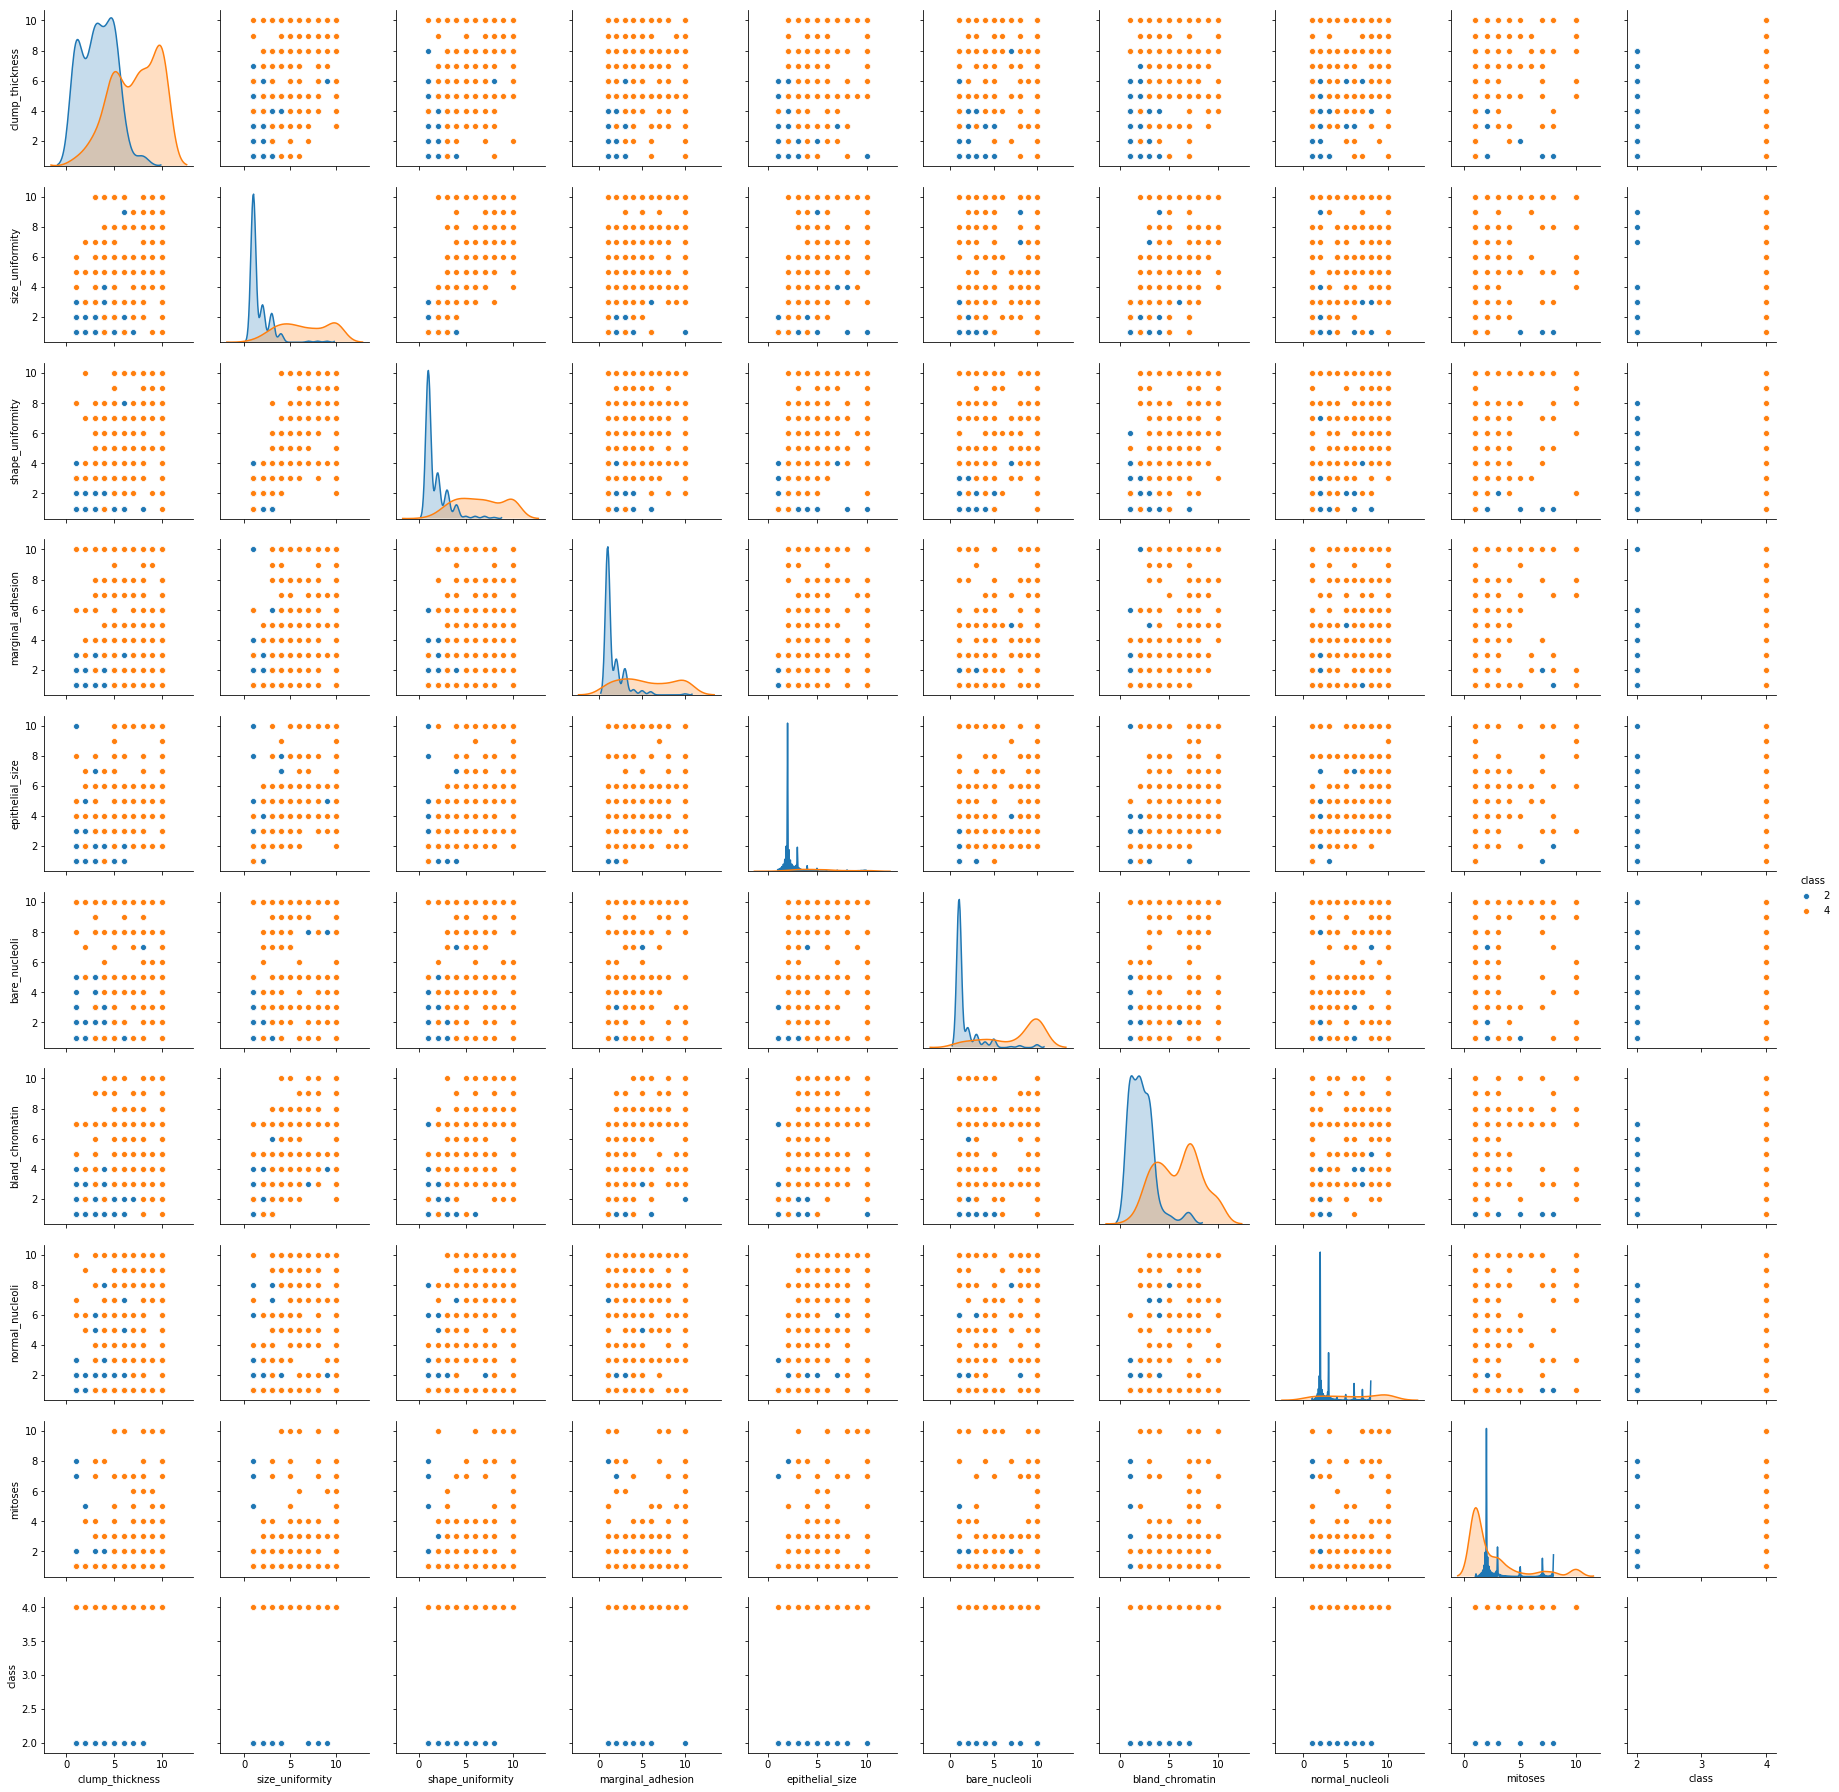

In [16]:
#class is the target prediction - in our dataset we have 2=-benign, 4=malignant
sns.pairplot(df, hue='class')

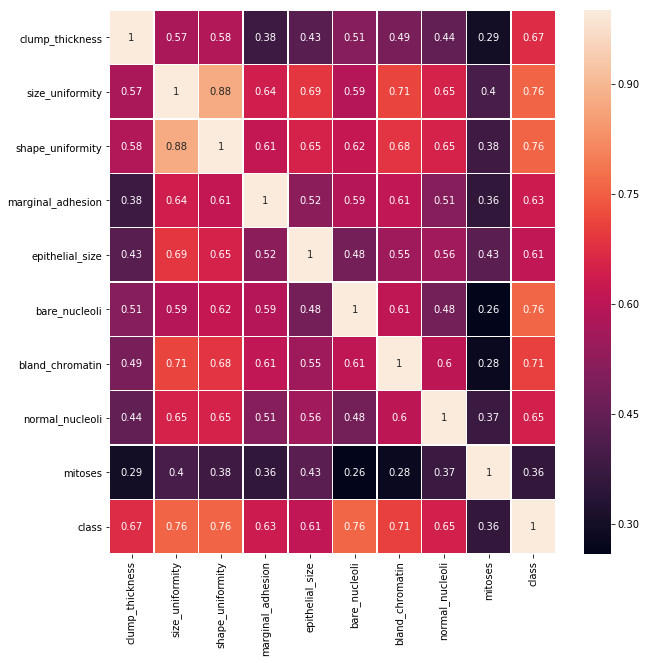

In [17]:
# Correlation visualisation:  Heatmap
#class is the target prediction (in this dataset we have 2=-benign, 4=malignant)
corr=df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths=0.5)

In [18]:
print(df.columns)

Index(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')


In [19]:
#drop 'class' column for training model, print column headers to confirm drop
x = df.drop(['class'], axis=1) # features input
y = df['class'] # target
print(x.columns)

Index(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses'],
      dtype='object')


clump_thickness
size_uniformity
shape_uniformity
marginal_adhesion
epithelial_size
bare_nucleoli
bland_chromatin
normal_nucleoli
mitoses


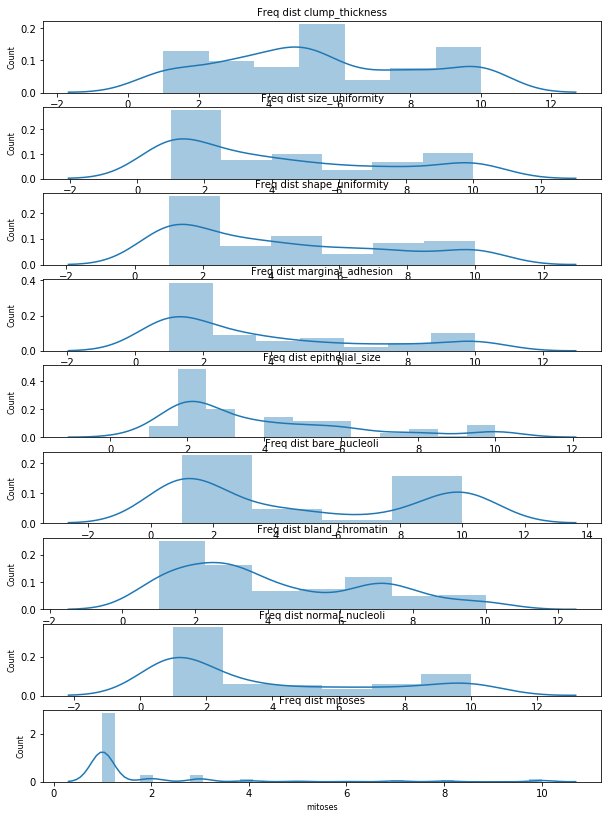

In [20]:
#Distribution plots for each feature
col_names=x.columns
fig, ax = plt.subplots(len(col_names), figsize=(10,14))

for i, col_val in enumerate(col_names):
    sns.distplot(x[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    print(col_val)
    


In [21]:
#split data into training set and test set (2/3: 1/3)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y, test_size=0.33, random_state=42)

In [22]:
#to use KNNClassifier, we need to identify the best value for k, which minimizes error. try k 1-100
from sklearn.neighbors import KNeighborsClassifier

err_rate = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    prediction_i = knn.predict(x_test)
    err_rate.append(np.mean(prediction_i != y_test))

Text(0, 0.5, 'Error Rate')

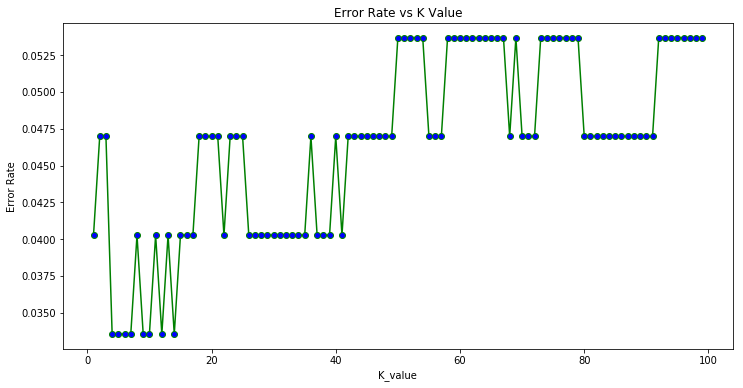

In [23]:
#plot the error rate vs k to see which value have the lowest error rate.
plt.figure(figsize=(12,6))
plt.plot(range(1,100), err_rate, color='green', marker ='o', markerfacecolor='blue')
plt.title('Error Rate vs K Value')
plt.xlabel('K_value')
plt.ylabel('Error Rate')

In [24]:
# from graph above, we can see that we could k=4,5,6,7,9,10,12,14.  To minimize run time, I've used 4

In [25]:
#Running multiple classification algorithms to determine best which one gives best results
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix

ALLmodels=[("DecisionTreeClassifier",DecisionTreeClassifier(criterion ='entropy', random_state = 0)),("GaussianNB", GaussianNB()),("LogisticRegression", LogisticRegression()), ("RandomForestClassifier", RandomForestClassifier()), ("KNeighborsClassifier",KNeighborsClassifier(n_neighbors=4)), ("SVM", SVC(kernel ='poly', degree=2, gamma='scale', random_state = 0))]

for model in ALLmodels:
    model=model[1]
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(model)
    print(model.score(x_test, y_test))
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    model=None

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
0.9395973154362416
              precision    recall  f1-score   support

           2       0.94      0.93      0.94        71
           4       0.94      0.95      0.94        78

   micro avg       0.94      0.94      0.94       149
   macro avg       0.94      0.94      0.94       149
weighted avg       0.94      0.94      0.94       149

[[66  5]
 [ 4 74]]
GaussianNB(priors=None, var_smoothing=1e-09)
0.9395973154362416
              precision    recall  f1-score   support

           2       0.98      0.89      0.93        71
           4       0.91      0.99      0.94        78

   micro avg       0.94      0.94      0.94       149
   

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.959731543624161
              precision    recall  f1-score   support

           2       0.99      0.93      0.96        71
           4       0.94      0.99      0.96        78

   micro avg       0.96      0.96      0.96       149
   macro avg       0.96      0.96      0.96       149
weighted avg       0.96      0.96      0.96       149

[[66  5]
 [ 1 77]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_s

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


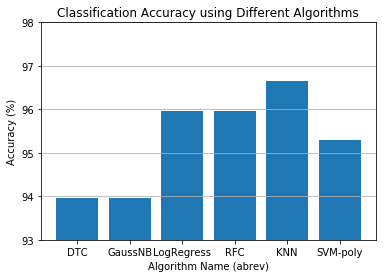

In [26]:
# plot the accuracy scores for each algoritm
import math
algorithm = ["DTC", "GaussNB", "LogRegress", "RFC", "KNN", "SVM-poly"]
Accuracy = [93.9597, 93.9597, 95.9732, 95.9732, 96.6443, 95.3020]

low = min(Accuracy)
high = max(Accuracy)

fig, ax = plt.subplots() 
ax.yaxis.grid(True)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])

plt.bar(algorithm,Accuracy) 


plt.title('Classification Accuracy using Different Algorithms')
plt.xlabel('Algorithm Name (abrev)')
plt.ylabel('Accuracy (%)')
plt.show()

# KMEANS and HIERARCHICAL CLUSTERING

In [27]:
#We could also use an unsupervised clustering model using n_clusters =2 (malignant or benign)
#A weakness of clustering in a classification problem could be allowing the model to choose the clusters.
#Use elbow method to confirm

In [28]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'SSE')

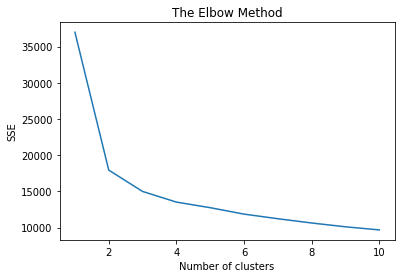

In [29]:
scores = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(x)
    scores.append(model.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), scores)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [30]:
#redefine x to include 'class' feature for clustering
x_columns = 10  # number of features
x = df.iloc[:, 0:x_columns].values
print(df.columns)

Index(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')


In [31]:
KMeans_model_2 = KMeans(n_clusters=2, random_state=0)
y_2 = KMeans_model_2.fit_predict(x)
print(df['class'].value_counts())
df['clusters']= KMeans_model_2.labels_
df['clusters'].value_counts()


4    236
2    213
Name: class, dtype: int64


1    230
0    219
Name: clusters, dtype: int64

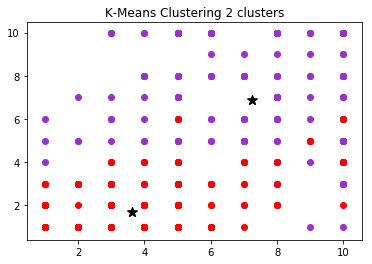

In [32]:
colors = ['darkorchid', 'red']
for i in range(2):
    plt.scatter(x[y_2 == i, 0], x[y_2 == i, 1], c=colors[i])
    plt.scatter(KMeans_model_2.cluster_centers_[:, 0], KMeans_model_2.cluster_centers_[:, 1], color='black', marker='*', s=100)
    plt.title('K-Means Clustering 2 clusters')

Text(0, 0.5, 'Euclidean distances')

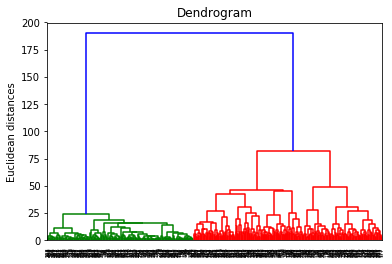

In [33]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method ='ward'))

import matplotlib.pyplot as plt
plt.title('Dendrogram')
#plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [34]:
from sklearn.cluster import AgglomerativeClustering
Hier_2 = AgglomerativeClustering(n_clusters = 2, affinity ='euclidean', linkage ='ward')

In [35]:
y_H_2 = Hier_2.fit_predict(x)

In [36]:
print(df['class'].value_counts())
df['Hclusters']= Hier_2.labels_
df['Hclusters'].value_counts()


4    236
2    213
Name: class, dtype: int64


0    253
1    196
Name: Hclusters, dtype: int64

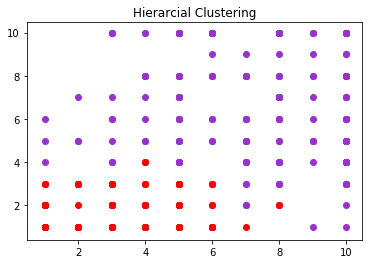

In [37]:
colors = ['darkorchid', 'red']
for i in range(2):
    plt.scatter(x[y_H_2 == i, 0], x[y_H_2 == i, 1], c=colors[i])
    plt.title('Hierarcial Clustering')

Text(0.5, 1.0, 'Hierarcial Clustering')

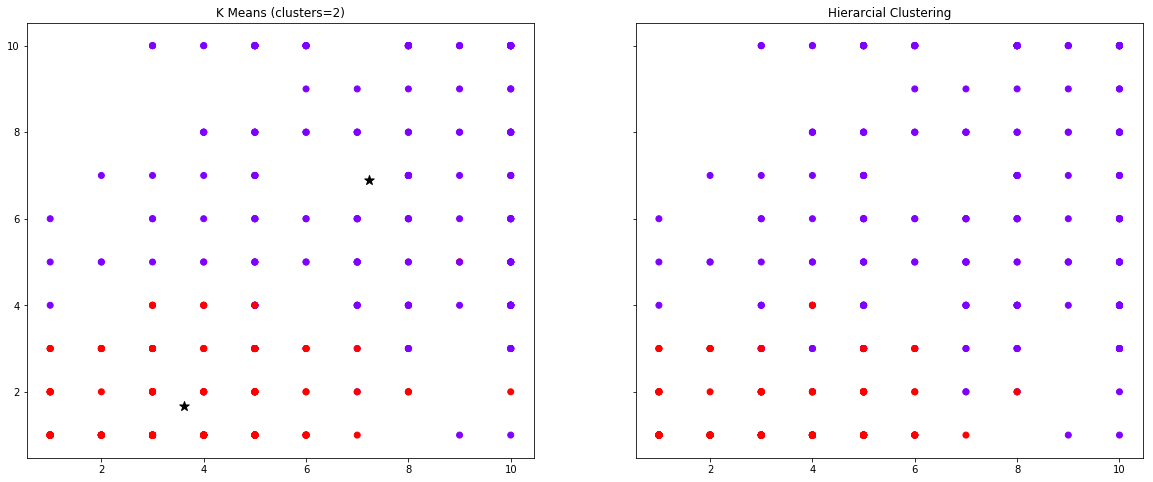

In [38]:
f, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (20,8))

#for fitted with kmeans
centers2 = KMeans_model_2.cluster_centers_
ax1.set_title('K Means (clusters=2)') 
ax1.scatter(x[:,0], x[:,1], c = KMeans_model_2.labels_, cmap = 'rainbow')
ax1.scatter(x=centers2[:,0], y=centers2[:,1], c='black', marker='*', s=100)


#for fitted using Hierarchical
ax2.scatter(x[:,0], x[:,1], c = Hier_2.labels_, cmap = 'rainbow')
ax2.set_title('Hierarcial Clustering')


